In [1]:
import csv
import matplotlib.pyplot as plt
from matplotlib import transforms
import numpy as np
import copy

In [2]:
DATASET_TYPES = ["AAVE_UK", "RAVDESS", "Accents"]

DATASET_TYPE_VAL = 0

DATASET_TYPE = DATASET_TYPES[DATASET_TYPE_VAL]

ASR_TYPES = ["MS_IBM", "GCP_IBM", "MS_GCP"]

TRANSFORMATION_TYPES = ["Amp", "Clipping", "Drop", "Frame", "HP", "LP", "Noise", "Scale"]

GROUPS = ['Male', 'Female']

SAVE_FOLDER = "/Users/sakshiudeshi/Documents/SUTD/Research/LaTeX/speechPaper/figs/"

In [3]:
def get_plot_title(DATASET_TYPE):
    if (DATASET_TYPE == "AAVE_UK"):
        return "AAVE/UK Midlands"
    else: return DATASET_TYPE

In [4]:
def get_filename_filler(dataset_type = DATASET_TYPE):
    if dataset_type == "Accents":
        return " Differential Speech Results - "
    else: 
        return " - " 

In [5]:
def get_orig_wer_rows_range(transformation_type = TRANSFORMATION_TYPES[0]):
    if (transformation_type == "Amp"):
        return [9]
    else:
        return [8]

In [6]:
def get_file_data(dataset_type_val, asr_type, transformation_type):
    file_name = DATASET_TYPES[dataset_type_val] + "/" + asr_type + "/" + asr_type + \
    get_filename_filler(DATASET_TYPES[dataset_type_val]) + transformation_type + ".csv"
    with open(file_name, newline='') as csvfile:
        reader = csv.reader(csvfile, delimiter=',')
        file_arr = list(reader)
    return file_arr, transformation_type, asr_type

In [7]:
def get_groups(dataset_type = DATASET_TYPE):
    if dataset_type == DATASET_TYPES[0]:
        return ['AAVE', 'Midlands']
    
    elif dataset_type == DATASET_TYPES[1]:
        return ['Male', 'Female']
    
    else:
        return ['English', 'Ganda', 'French', 'Gujarati', 'Indonesian' ,'Korean', 'Russian']
    
GROUPS = get_groups()
print(GROUPS)

['AAVE', 'Midlands']


In [8]:
def process_num_arr(num_arr):
    tag = str(num_arr[0])
    num_arr = num_arr[1:len(num_arr)]
    return [float(i) for i in num_arr], tag

In [9]:
def get_original_wer(dataset_type_val, asr_type, transformation_type = TRANSFORMATION_TYPES[0]):
    file_data, _, _ = get_file_data(dataset_type_val, asr_type, transformation_type)
    diff_rows = get_orig_wer_rows_range(transformation_type)
    row_arr, tag_arr = [], []
#     print(file_data)
    for i in diff_rows:
        row, tag = process_num_arr(file_data[i - 1])
        row_arr.append(row)
        tag_arr.append(tag)
    return row_arr, tag_arr

In [10]:
for dataset_type_val, dataset_type in enumerate(DATASET_TYPES):
    print(dataset_type)
    for asr_type in ASR_TYPES:
        row_arr, tag_arr = (get_original_wer(dataset_type_val, asr_type))
        print(row_arr)
    print()

AAVE_UK
[[0.6530612245, 0.1627906977]]
[[0.7, 0.1818181818]]
[[0.5094339623, 0.09090909091]]

RAVDESS
[[0.0, 0.02083333333]]
[[0.0, 0.03157894737]]
[[0.0, 0.04166666667]]

Accents
[[0.08695652174, 0.1538461538, 0.07971014493, 0.1480144404, 0.1541218638, 0.2977941176, 0.1781818182]]
[[0.1090909091, 0.2132867133, 0.1123188406, 0.152173913, 0.1612903226, 0.3455882353, 0.1781818182]]
[[0.1272727273, 0.2323943662, 0.115942029, 0.1527272727, 0.1444444444, 0.3793103448, 0.2177121771]]



In [25]:
def autolabel(rects, dataset_type = DATASET_TYPE):
    
    
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        if dataset_type == DATASET_TYPES[0]:
            text_height = height + max(0.02*height, 0.02)
    
        elif dataset_type == DATASET_TYPES[1]:
            text_height = height + max([0.0005])

        else:
            text_height = height + max(0.02*height, 0.005)
            
        ax.text(rect.get_x() + rect.get_width()/2., text_height,
                '%.2f' % float(height),
                ha='center', va='bottom', rotation="vertical")

[[0.6530612245, 0.1627906977], [0.7, 0.1818181818], [0.5094339623, 0.09090909091]]


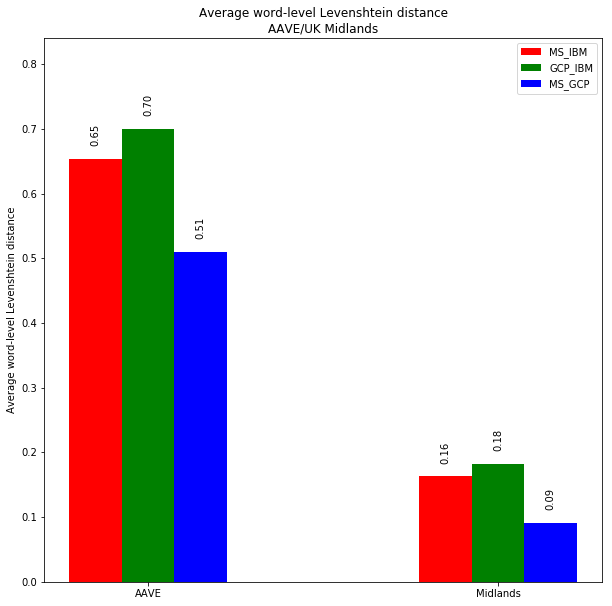

[[0.0, 0.02083333333], [0.0, 0.03157894737], [0.0, 0.04166666667]]


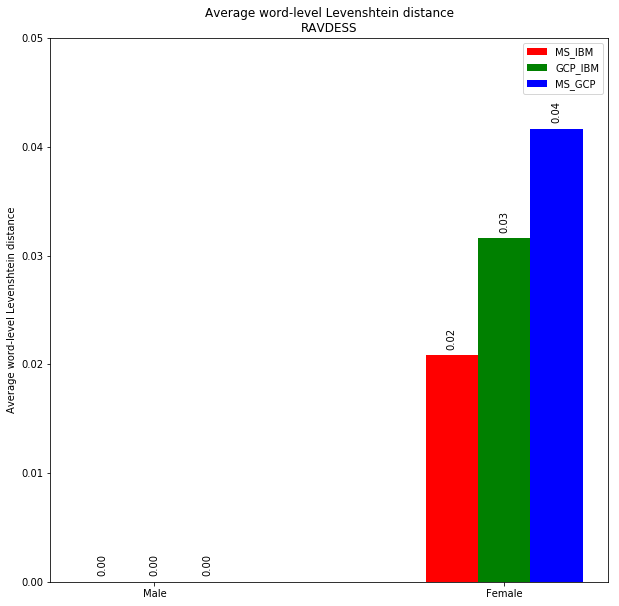

[[0.08695652174, 0.1538461538, 0.07971014493, 0.1480144404, 0.1541218638, 0.2977941176, 0.1781818182], [0.1090909091, 0.2132867133, 0.1123188406, 0.152173913, 0.1612903226, 0.3455882353, 0.1781818182], [0.1272727273, 0.2323943662, 0.115942029, 0.1527272727, 0.1444444444, 0.3793103448, 0.2177121771]]


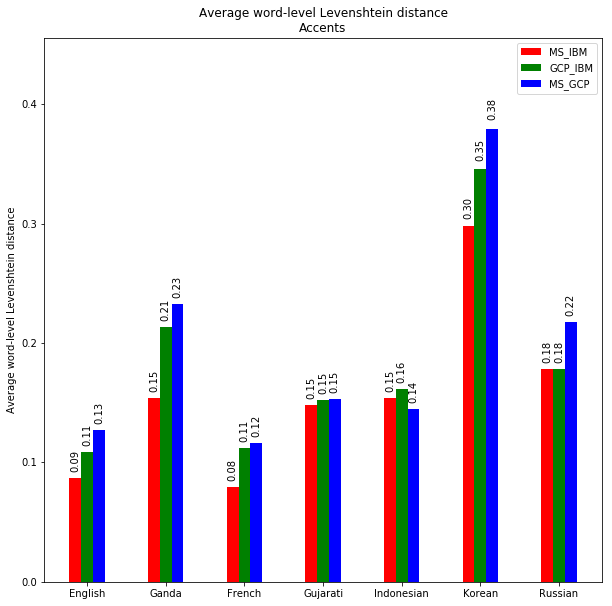

In [29]:
for dataset_type_val, dataset_type in enumerate(DATASET_TYPES): 
    # WER plots
    width = 0.15
    # spacing = 0.2
    DATASET_TYPE = DATASET_TYPES[dataset_type_val]
    colors = ['r', 'g', 'b', 'y']
    tau_vals = [0.01, 0.05, 0.1, 0.15]
    step_size = 1


    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111)

#     dataset_type_val = 0

    GROUPS = get_groups(DATASET_TYPES[dataset_type_val])

    N = len(GROUPS)
    ind = np.arange(N * step_size, step = step_size) 
    # print(ind + width*i)

    rects = []

    sum_arrs = []

    # for dataset_type_val, dataset_type in enumerate(DATASET_TYPES):

    for i, asr_type in enumerate(ASR_TYPES):
        sum_arr, tag_arr = (get_original_wer(dataset_type_val, asr_type))
        sum_arr = sum_arr[0]
        sum_arrs.append(sum_arr)
        rects.append(ax.bar(ind + width * i, sum_arr, width = width, color=colors[i]))
    #     plt.bar(LANGUAGES, sum_arr)

    print(sum_arrs)


    for rect in rects:
        autolabel(rect, DATASET_TYPE)

    plt.ylim(top = np.max(sum_arrs) *1.2)



    ax.legend((rect for rect in rects), (asr_type for asr_type in ASR_TYPES))
    ax.set_xticks(ind + width *1)
    ax.set_xticklabels(GROUPS)
    ax.set_ylabel('Average word-level Levenshtein distance')

    plt.title ("Average word-level Levenshtein distance\n" + get_plot_title(DATASET_TYPE))
    plt.savefig(SAVE_FOLDER + DATASET_TYPE + "-Total-Diff-Lev",bbox='tight', dpi=300)
    plt.show()
